# Task 3: Customer Segmentation / Clustering

### **Importing Required Libraries**
We begin by importing the necessary libraries for data processing, clustering, evaluation, and visualization.

In [17]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import davies_bouldin_score
import matplotlib.pyplot as plt
import seaborn as sns

### **Load the datasets**

In [18]:
customers_df = pd.read_csv('Customers.csv')
transactions_df = pd.read_csv('Transactions.csv')

### **Merge the transaction data with customer data**

In [19]:
customer_transactions_df = pd.merge(transactions_df, customers_df, on='CustomerID', how='inner')

### **Aggregate data by customer to create features**

In [20]:
customer_summary = customer_transactions_df.groupby('CustomerID').agg(
    total_spend=('TotalValue', 'sum'),
    total_products_bought=('Quantity', 'sum'),
    last_purchase_date=('TransactionDate', 'max')
).reset_index()

### **Add recency feature: Time since last purchase (in days)**

In [21]:
customer_summary['recency'] = (pd.to_datetime('today') - pd.to_datetime(customer_summary['last_purchase_date'])).dt.days

### **Standardize numerical features**

In [22]:
numerical_features = ['total_spend', 'total_products_bought', 'recency']
scaler = StandardScaler()
customer_summary[numerical_features] = scaler.fit_transform(customer_summary[numerical_features])

### **customer summary with features**

In [23]:
customer_summary.head()

,CustomerID,total_spend,total_products_bought,last_purchase_date,recency
0,C0001,-0.061701,-0.122033,2024-11-02 17:04:16,-0.258366
1,C0002,-0.877744,-0.448000,2024-12-03 01:41:41,-0.696600
2,C0003,-0.405857,0.203934,2024-08-24 18:54:04,0.731195
3,C0004,1.032547,1.670787,2024-12-23 14:13:52,-0.979331
4,C0005,-0.783929,-0.936951,2024-11-04 00:30:22,-0.286639


### **Perform K-Means clustering**

In [24]:
kmeans = KMeans(n_clusters=5, random_state=42)  # You can choose the number of clusters (2 to 10)
customer_summary['cluster'] = kmeans.fit_predict(customer_summary[numerical_features])

C:\Users\nihar\Documents\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\nihar\Documents\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


### **Calculate the Davies-Bouldin Index**

In [25]:
db_index = davies_bouldin_score(customer_summary[numerical_features], customer_summary['cluster'])

print(f"DB Index: {db_index}")

DB Index: 0.8889944929055071


### **Apply PCA for dimensionality reduction (2D visualization)**

In [26]:
pca = PCA(n_components=2)
pca_components = pca.fit_transform(customer_summary[numerical_features])

### **Create a DataFrame for plotting**

In [27]:
pca_df = pd.DataFrame(pca_components, columns=['PCA1', 'PCA2'])
pca_df['cluster'] = customer_summary['cluster']

### **Plot the clusters**

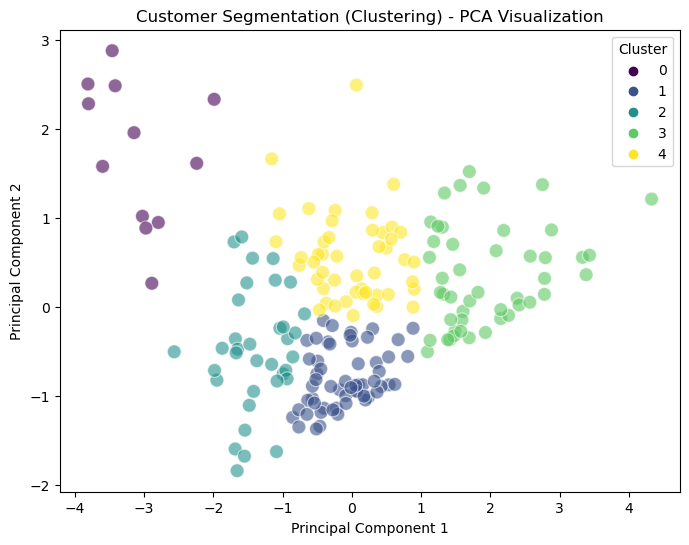

In [15]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='PCA1', y='PCA2', hue='cluster', palette='viridis', data=pca_df, s=100, alpha=0.6)
plt.title("Customer Segmentation (Clustering) - PCA Visualization")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(title="Cluster")
plt.show()

### **Inspect the cluster centers**

In [28]:
cluster_centers = pd.DataFrame(kmeans.cluster_centers_, columns=numerical_features)
print(cluster_centers)

   total_spend  total_products_bought   recency
0    -1.478348              -1.520976  2.842258
1    -0.338375              -0.267860 -0.688415
2    -1.030844              -1.025428  0.116456
3     1.344399               1.362158 -0.481844
4     0.206674               0.112256  0.493818
